# 4. List Preprocessing Techniques Required

### We will handle preprocessing by:
### - Encoding categorical variables.
### - Handling missing data (if any).
### - Normalizing numerical features for consistency.

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("bank-additional-full.csv",sep=';')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

#### Checking for missing values

In [5]:
missing_values = df.isnull().sum()
print("Missing values in the dataset:", missing_values)

Missing values in the dataset: age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Preprocessing Steps

#### 1. Encoding categorical variables using OneHotEncoder

##### Encodes categorical variables into binary values (e.g., job, marital, education) to prepare them for machine learning models.

In [7]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#### Standardizing numerical columns

##### Standardizes numerical features (like age, duration) to have a mean of 0 and a standard deviation of 1, which improves model performance.

In [9]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
print("Preprocessed data (first 5 rows):")
print(data_encoded.head())

Preprocessed data (first 5 rows):
        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533034  0.010471 -0.565922  0.195414 -0.349494      0.648092   
1  1.628993 -0.421501 -0.565922  0.195414 -0.349494      0.648092   
2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494      0.648092   
3 -0.002309 -0.413787 -0.565922  0.195414 -0.349494      0.648092   
4  1.533034  0.187888 -0.565922  0.195414 -0.349494      0.648092   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ... month_may  \
0        0.722722       0.886447    0.71246      0.33168  ...      True   
1        0.722722       0.886447    0.71246      0.33168  ...      True   
2        0.722722       0.886447    0.71246      0.33168  ...      True   
3        0.722722       0.886447    0.71246      0.33168  ...      True   
4        0.722722       0.886447    0.71246      0.33168  ...      True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False     

# 5. Applying Preprocessing Techniques

### we are splitting the data into training and testing sets and applying the preprocessing techniques defined earlier.

#### Defining the target variable (y) and feature variables (X):

In [10]:
X = data_encoded.drop(columns=['y'])
y = data_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

#### Splitting the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (28831, 53)
Testing features shape: (12357, 53)


# 6. Perform Exploratory Data Analysis (EDA):

### We will perform exploratory data analysis to understand the distribution of numerical and categorical variables and their correlation with the target variable.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


#### 1. Summary statistics

In [15]:
summary_stats = df.describe()
print("Summary statistics of the dataset:")
print(summary_stats)

Summary statistics of the dataset:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960

#### 2. Distribution of numerical features

##### Distribution of Age helps visualize how age varies among clients.

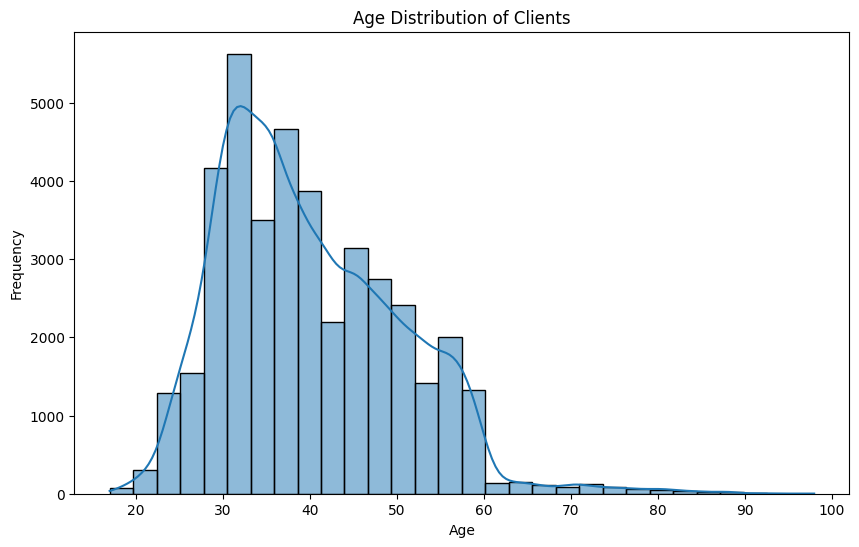

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### 3. Bar plot for categorical variable 'job'

##### Job Distribution shows which types of jobs are more common among the clients.

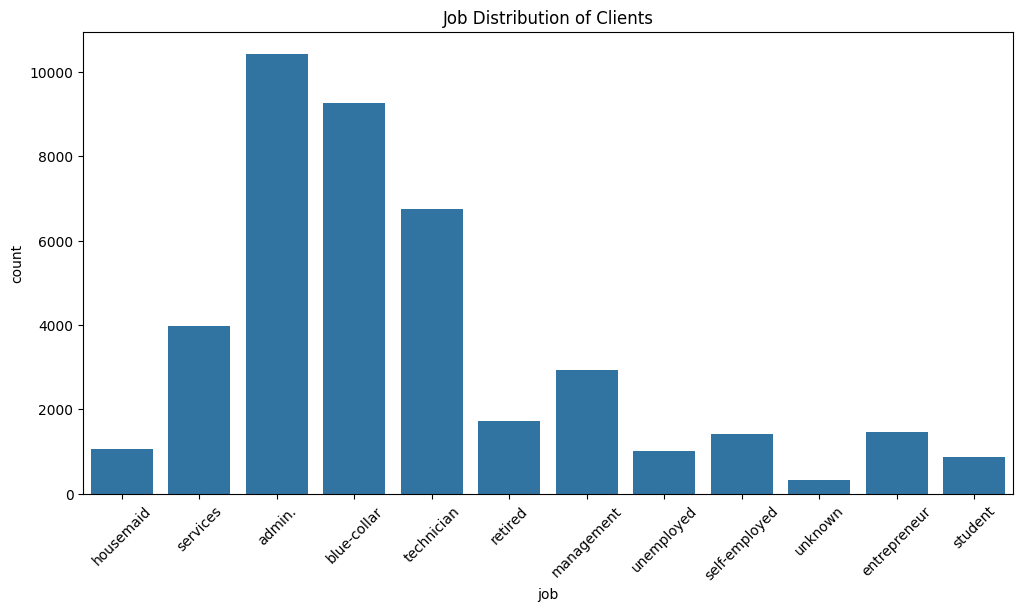

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df)
plt.title('Job Distribution of Clients')
plt.xticks(rotation=45)
plt.show()

#### 4. Correlation matrix for numerical features

##### Correlation Matrix reveals relationships between different numerical features.

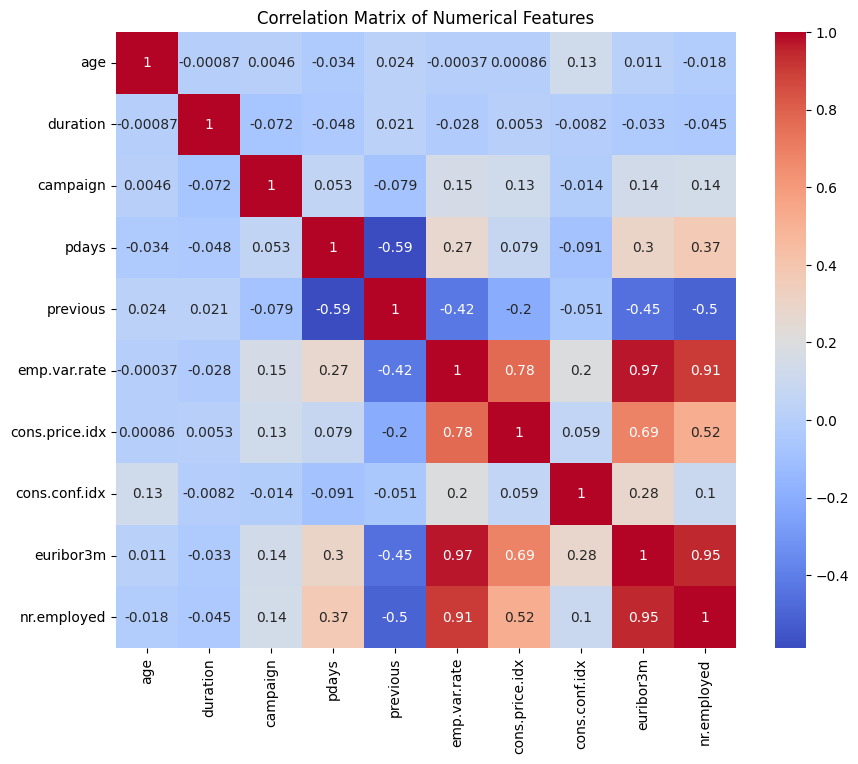

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_encoded[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### 5. Target variable distribution

##### Target Distribution displays the proportion of clients who subscribed to a term deposit.

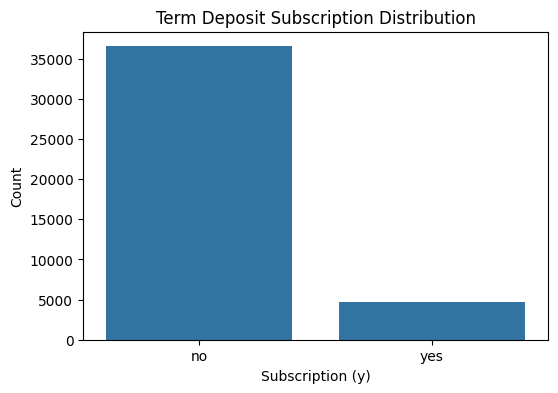

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Term Deposit Subscription Distribution')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.show()